In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/adityapimpalkar/miniconda3/envs/tf/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
met = pd.read_csv('../data/meterology.csv')

In [3]:
plot1 = pd.read_csv('../data/davitt_road/data-plot-27.csv')
plot2 = pd.read_csv('../data/davitt_road/data-plot-28.csv')
plot3 = pd.read_csv('../data/davitt_road/data-plot-29.csv')
plot4 = pd.read_csv('../data/davitt_road/data-plot-18.csv')
plot5 = pd.read_csv('../data/davitt_road/data-plot-19.csv')
plot6 = pd.read_csv('../data/davitt_road/data-plot-20.csv')

In [4]:
aqi = pd.concat([plot1,plot2,plot3,plot4,plot5,plot6], axis=0).reset_index()

In [5]:
aqi = aqi.rename(columns={'Date and Time': 'datetime', 'PM<sub>10</sub>': 'pm10', 'PM<sub>2.5</sub>': 'pm2.5'})
met = met.rename(columns = {
                            "rain": "rain (mm)",
                            "temp": "Air temp (C)", 
                            "wetb": "Wet bulb temp (C)", 
                            "dewpt": "Dew Point temp (C)",
                            "vappr": "Vapor Pressure (hPa)",
                            "rhum": "Relative Humidity(%)",
                            "msl": "Mean Sea Level Pressure (hPa)"
                           })
met = met.drop(["Unnamed: 0"], axis=1)
aqi = aqi.drop(['NO<sub>2</sub>'], axis=1)

In [6]:
aqi

,index,datetime,pm10,pm2.5
0,0,2021-01-01 00:00:00,15.57,12.29
1,1,2021-01-01 01:00:00,11.19,8.44
2,2,2021-01-01 02:00:00,7.99,5.24
3,3,2021-01-01 03:00:00,7.19,5.32
4,4,2021-01-01 04:00:00,6.89,4.57
...,...,...,...,...
17426,2917,2022-12-31 19:00:00,38.79,34.74
17427,2918,2022-12-31 20:00:00,54.15,50.14
17428,2919,2022-12-31 21:00:00,48.46,44.09
17429,2920,2022-12-31 22:00:00,46.55,43.49


In [7]:
met

,datetime,rain (mm),Air temp (C),Wet bulb temp (C),Dew Point temp (C),Vapor Pressure (hPa),Relative Humidity(%),Mean Sea Level Pressure (hPa)
0,2021-01-01 00:00:00,0.0,4.7,3.9,2.8,7.5,88.0,1012.9
1,2021-01-01 01:00:00,0.0,4.6,3.9,2.7,7.4,87.0,1013.4
2,2021-01-01 02:00:00,0.0,4.3,3.7,2.7,7.4,89.0,1013.8
3,2021-01-01 03:00:00,0.0,4.1,3.5,2.6,7.4,89.0,1014.3
4,2021-01-01 04:00:00,0.0,3.6,3.0,2.1,7.1,89.0,1014.6
...,...,...,...,...,...,...,...,...
17492,2022-12-30 20:00:00,0.0,7.4,6.6,5.5,9.0,87.0,989.8
17493,2022-12-30 21:00:00,0.1,7.2,6.2,4.8,8.6,84.0,990.1
17494,2022-12-30 22:00:00,0.0,7.3,6.1,4.5,8.4,82.0,990.4
17495,2022-12-30 23:00:00,0.0,7.5,6.4,4.9,8.7,83.0,990.6


In [8]:
aqi.dtypes

index         int64
datetime     object
pm10        float64
pm2.5       float64
dtype: object

In [9]:
met.dtypes

datetime                          object
rain (mm)                        float64
Air temp (C)                     float64
Wet bulb temp (C)                float64
Dew Point temp (C)               float64
Vapor Pressure (hPa)             float64
Relative Humidity(%)             float64
Mean Sea Level Pressure (hPa)    float64
dtype: object

In [10]:
aqi['datetime'] = pd.to_datetime(aqi['datetime'])
met['datetime'] = pd.to_datetime(met['datetime'])

In [11]:
aqi[["pm10", "pm2.5"]].describe()

,pm10,pm2.5
count,16750.000000,16750.000000
mean,14.133737,8.443380
std,12.459571,9.310253
min,0.000000,0.000000
25%,7.010000,3.670000
50%,11.120000,5.865000
75%,17.290000,9.877500
max,199.170000,168.510000


In [12]:
davitt_port = pd.merge(met[['datetime', 
                                  'rain (mm)', 
                                  'Relative Humidity(%)', 
                                  'Mean Sea Level Pressure (hPa)',
                                  'Air temp (C)', 
                                  'Wet bulb temp (C)', 
                                  'Dew Point temp (C)', 
                                  'Vapor Pressure (hPa)']], aqi, how='left')

In [13]:
davitt_port_corr = davitt_port[[
                                  'Relative Humidity(%)', 
                                  'Mean Sea Level Pressure (hPa)',
                                  'Air temp (C)', 
                                  'Wet bulb temp (C)', 
                                  'Dew Point temp (C)', 
                                  'Vapor Pressure (hPa)',
                                   'pm10',
                                   'pm2.5']].corr()

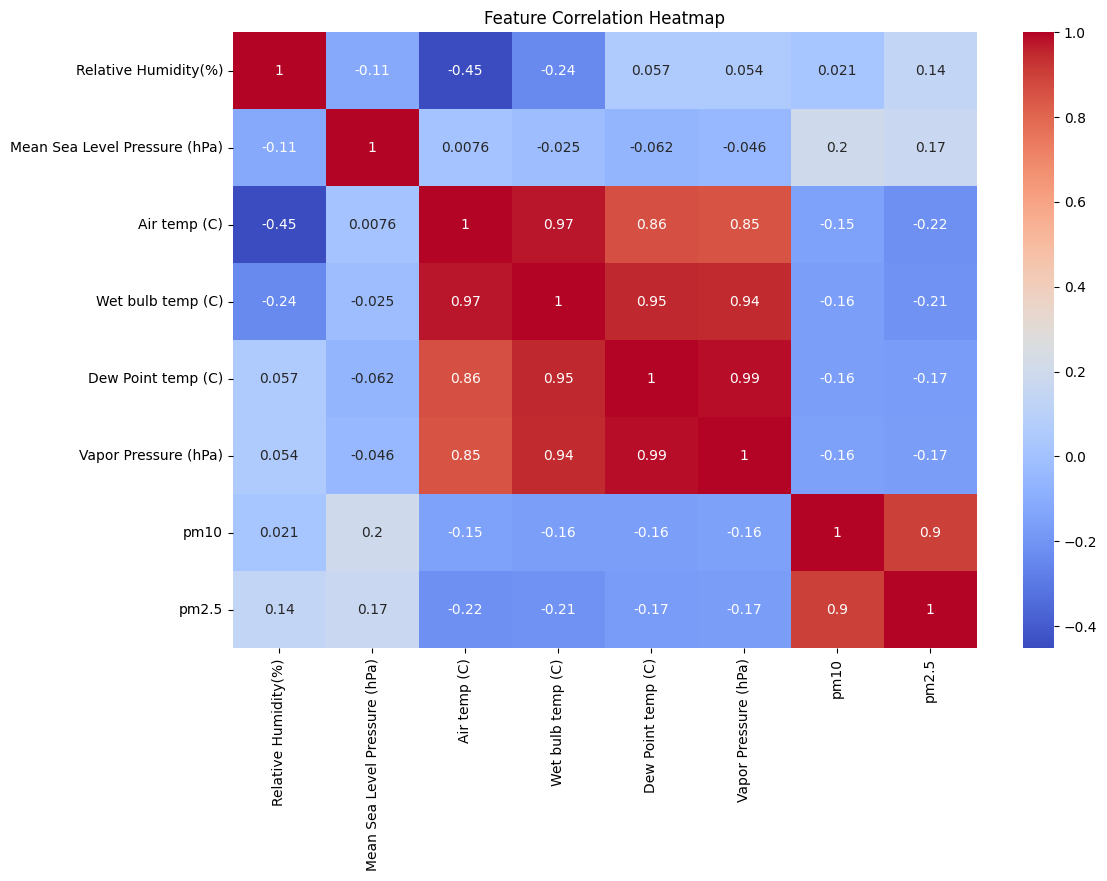

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(davitt_port_corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [15]:
davitt_port.isna().sum()

datetime                           0
rain (mm)                          0
Relative Humidity(%)               0
Mean Sea Level Pressure (hPa)      0
Air temp (C)                       0
Wet bulb temp (C)                  0
Dew Point temp (C)                 0
Vapor Pressure (hPa)               0
index                            215
pm10                             770
pm2.5                            770
dtype: int64

In [16]:
davitt_port = davitt_port.dropna()

In [17]:
davitt_port.isna().sum()

datetime                         0
rain (mm)                        0
Relative Humidity(%)             0
Mean Sea Level Pressure (hPa)    0
Air temp (C)                     0
Wet bulb temp (C)                0
Dew Point temp (C)               0
Vapor Pressure (hPa)             0
index                            0
pm10                             0
pm2.5                            0
dtype: int64

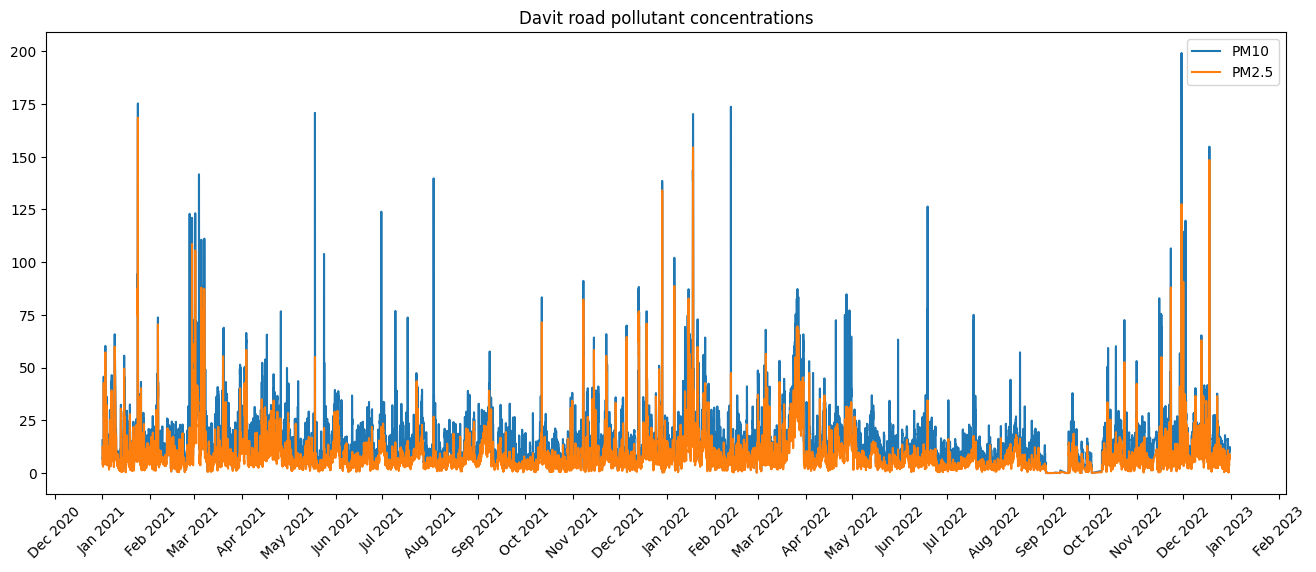

In [18]:
import matplotlib.dates as mdates
timeframe = davitt_port[(davitt_port['datetime'] >= '2021-01-01')
                         & (davitt_port['datetime'] <= '2022-12-31')]

plt.figure(figsize=(16, 6))
sns.lineplot(data=timeframe, x='datetime', y='pm10', label='PM10')
sns.lineplot(data=timeframe, x='datetime', y='pm2.5', label='PM2.5')
plt.xlabel('')
plt.ylabel('')
plt.title('Davit road pollutant concentrations')
plt.xticks(rotation=45)

date_formatter = mdates.DateFormatter('%b %Y')  # Format as abbreviated month and year (e.g., Jan 2022)
desired_tick_frequency = mdates.MonthLocator()
# Apply the tick frequency and formatter to the x-axis
plt.gca().xaxis.set_major_locator(desired_tick_frequency)
plt.gca().xaxis.set_major_formatter(date_formatter)

plt.legend()

In [19]:
davitt_port = davitt_port.rename(columns = {
                            "rain (mm)": "rain",
                            "Air temp (C)": "temp", 
                            "Wet bulb temp (C)": "wetb", 
                            "Dew Point temp (C)": "dewpt",
                            "Vapor Pressure (hPa)": "vappr",
                            "Relative Humidity(%)": "rhum",
                            "Mean Sea Level Pressure (hPa)": "msl"
                           })

In [20]:
davitt_port["hour"] = davitt_port["datetime"].dt.hour
davitt_port["day"] = davitt_port["datetime"].dt.day
davitt_port["month"] = davitt_port["datetime"].dt.month
davitt_port = davitt_port.drop(['index'], axis=1)

In [21]:
davitt_port[["datetime", "temp", "wetb", "dewpt", "vappr", "pm10", "pm2.5", "hour", "month", "day"]]

,datetime,temp,wetb,dewpt,vappr,pm10,pm2.5,hour,month,day
0,2021-01-01 00:00:00,4.7,3.9,2.8,7.5,15.57,12.29,0,1,1
1,2021-01-01 01:00:00,4.6,3.9,2.7,7.4,11.19,8.44,1,1,1
2,2021-01-01 02:00:00,4.3,3.7,2.7,7.4,7.99,5.24,2,1,1
3,2021-01-01 03:00:00,4.1,3.5,2.6,7.4,7.19,5.32,3,1,1
4,2021-01-01 04:00:00,3.6,3.0,2.1,7.1,6.89,4.57,4,1,1
...,...,...,...,...,...,...,...,...,...,...
17492,2022-12-30 20:00:00,7.4,6.6,5.5,9.0,11.00,7.93,20,12,30
17493,2022-12-30 21:00:00,7.2,6.2,4.8,8.6,11.86,8.92,21,12,30
17494,2022-12-30 22:00:00,7.3,6.1,4.5,8.4,10.84,7.42,22,12,30
17495,2022-12-30 23:00:00,7.5,6.4,4.9,8.7,10.08,6.61,23,12,30


In [22]:
davitt_port.to_csv('../data/davitt_road.csv')